****

**AUTHOR: ANKUSH KUMAR MAHTO**

**GRIP at The Sparks Foundation Task 1 : Predictions Using Supervised Machine Learning**

**Dscription: We have to predict the percentage of the student based on the hours studied by student. Also we have to predict the score if a student studies for 9.25 hrs/day. since it involves only two variables, this is a simple linear regression task.**

**step-1 Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


**step-2 read the data from data set

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(url)

In [3]:
print(student_data.shape)
student_data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**checking the missing values**

In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**So, As we can see, there is no missing values in our data.**

**Step-3 Visualising Dataset**

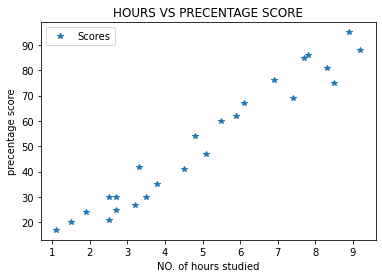

In [6]:
#plotting the distribution of scores
student_data.plot(x='Hours',y='Scores', style='*')
plt.title('HOURS VS PRECENTAGE SCORE')
plt.xlabel('NO. of hours studied')
plt.ylabel('precentage score')
plt.show()

**after visualising the plot, we can predict a positive linear relation between the number of hours studied and precentage of score.**

In [7]:
# check the corerlation between No. of hours and percentage scores.
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**This shows the positive correlation between No. of hours and percentage scores**

In [8]:
# slicing the data by iloc Function
X = student_data.iloc[:,:-1].values
Y = student_data.iloc[:,1].values

**# step-5 Model Training**

**split the data into training and testing sets, and train the model**

In [9]:
#train the model
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size=0.2, random_state=0)
regressor=LinearRegression()
regressor.fit(X_train.reshape(-1,1),Y_train)

LinearRegression()

**step-6 Visualising the data**


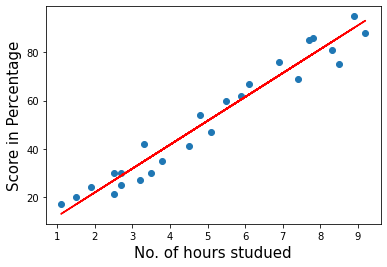

In [10]:
#plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#plotting for the test data
plt.scatter(X,Y)
plt.plot(X, line, color='red');
plt.xlabel('No. of hours studued',fontsize=15)
plt.ylabel('Score in Percentage',fontsize=15)
plt.show()


**step-7 Making Predictions**

In [11]:
# Testing data
print(X_test)
# Model Prediction
Y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**step-8 compare actual result to the predicted result**

In [12]:
# Actual vs Predicted
df = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**step-9 Predict the score for 9.25 Hours/Day**

In [13]:
X = 9.25
predicted_score = regressor.predict([[X]])

In [14]:
print(f'No. of hours = {X}')
print(f'predicted_score = {predicted_score}')


No. of hours = 9.25
predicted_score = [93.69173249]


**predicted score for who studied for 9.25 Hours/Day is 93.69173249%**

**step-10 Evaluating the model**

In [15]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(Y_test,Y_pred))
print("Mean Squared Error",metrics.mean_squared_error(Y_test,Y_pred))

Mean Absolute Error 4.183859899002982
Mean Squared Error 21.598769307217456


**THANK YOU.**